<a href="https://colab.research.google.com/github/JessicaIsabelle/Bootcamp-Data-Analytics-Womakers-Code/blob/main/Consumo_Cosmeticos_PreePosPandemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bootcamp Data Analytics 2022**
Challenge Probabilidade e Amostragem

# DESAFIO 1 : Entendendo o Consumidor

Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import binom
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt


Importando base de dados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dados=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/desafio-01-consumidor.csv')
dados.head(5)

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


Passo 1: Entenda a distribuição de variáveis como de idade / renda / regiao /
produtos mais comprados antes e depois da pandemia  

a.Identifique as distribuições
1.   Distribuição binominal:pre-pandemia
2.   Distribuição normal: idade, renda, região e produtos

b. Plote histogramas / boxplots                     



In [5]:
## Dividindo a base em antes e após a pandemia para facilitar manipulações futuras
dados_pre=dados[dados['pre-pandemia']==1]
dados_pos=dados[dados['pre-pandemia']==0]


In [ ]:
## TABELA COM VENDAS POR REGIÃO PRE E PÓS PADNDEMIA
analise_regiao=pd.crosstab(dados['regiao-BR'],dados['pre-pandemia'])
analise_regiao=analise_regiao.rename(columns={0:'Pos-pandemia',1:'Pre-pandemia'})
analise_regiao

pre-pandemia,Pos-pandemia,Pre-pandemia
regiao-BR,,
Centro-Oeste,8,17
Nordeste,25,26
Norte,9,8
Sudeste,18,21
Sul,42,29


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


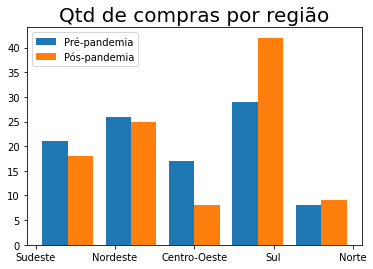

In [6]:
# GRÁFICO COM COMPRAS POR REGIÃO COMPARANDO PRÉ E PÓS-PANDEMIA
plt.title('Qtd de compras por região', fontsize=20)
plt.hist([dados_pre['regiao-BR'], dados_pos['regiao-BR']], 5, label=['Pré-pandemia', 'Pós-pandemia'])
plt.legend(loc='upper left')


In [7]:
# ANÁLISE DE PRODUTOS CONSUMIDOS PRÉ E PÓS-PANDEMIA
produto=pd.crosstab(dados['produto'],dados['pre-pandemia'])
produto=produto.rename(columns={0:'Pos-pandemia',1:'Pre-pandemia'})
produto

pre-pandemia,Pos-pandemia,Pre-pandemia
produto,,
antissinais,20,9
base,4,3
batom,15,61
desodorante,46,20
perfume,8,4
sombra,9,4


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


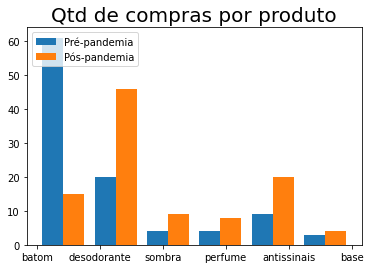

In [8]:
plt.title('Qtd de compras por produto', fontsize=20)
plt.hist([dados_pre['produto'], dados_pos['produto']], 6, label=['Pré-pandemia', 'Pós-pandemia'])
plt.legend(loc='upper left')

In [9]:
# ANÁLISE DE IDADE DOS CONSUMIDORES, como havia muitas idades diferentes, dividi em 4 faixas etárias
classes=[0,20,40,60,150]
labels=['<20 anos','entre 20 e 40 anos','entre 40 e 60 anos','maiores de 60 anos']
idade_pre=pd.value_counts(pd.cut(x=dados_pre['idade'],bins=classes,labels=labels,include_lowest=True)).sort_index()
idade_pos=pd.value_counts(pd.cut(x=dados_pos['idade'],bins=classes,labels=labels,include_lowest=True)).sort_index()
idade=pd.concat([idade_pos,idade_pre],axis=1)
idade.columns = ['pos-pandemia', 'pre-pandemia']
idade

,pos-pandemia,pre-pandemia
<20 anos,3,5
entre 20 e 40 anos,37,54
entre 40 e 60 anos,48,32
maiores de 60 anos,14,10


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


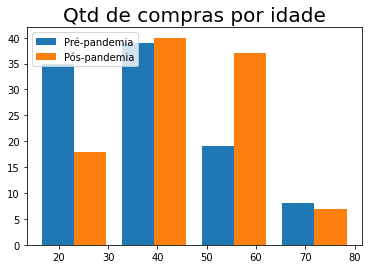

In [11]:
plt.title('Qtd de compras por idade', fontsize=20)
plt.hist([dados_pre['idade'], dados_pos['idade']], 4, label=['Pré-pandemia', 'Pós-pandemia'])
plt.legend(loc='upper left')

In [12]:
dados['renda'].describe()
classes=[110,2000,5000,15000,30000]
labels=['<R$2000','entre <R$2000 e <R$5000','entre <R$5000 e <R$15000','maiores de <R$15000']
renda_pre=pd.value_counts(pd.cut(x=dados_pre['renda'],bins=classes,labels=labels,include_lowest=True)).sort_index()
renda_pos=pd.value_counts(pd.cut(x=dados_pos['renda'],bins=classes,labels=labels,include_lowest=True)).sort_index()
renda=pd.concat([renda_pos,renda_pre],axis=1)
renda.columns = ['pos-pandemia', 'pre-pandemia']
renda

,pos-pandemia,pre-pandemia
<R$2000,1,7
entre <R$2000 e <R$5000,2,19
entre <R$5000 e <R$15000,61,58
maiores de <R$15000,38,17


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


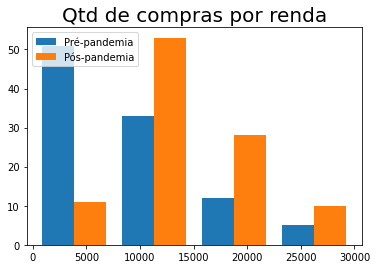

In [13]:
plt.title('Qtd de compras por renda', fontsize=20)
plt.hist([dados_pre['renda'], dados_pos['renda']], 4, label=['Pré-pandemia', 'Pós-pandemia'])
plt.legend(loc='upper left')

2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia
provar estatisticamente que essas diferenças são significativas ? (pergunta
extra)
Sim! Apesar da quantidade de compras pré e pós pandemia ter se mantido praticamente igual. Pré-pandemia 101 vendas e pós pandemia 102. A característica do consumidor mudou muito.

*   Região: consumo diminuiu no Centro Oeste e aumentou no Sul
*   Produto: o batom diminuiu o consumo. Já antisinais e desodorante aumentaram
*   Renda: População com salário < R$5000 reduziu significativamente as compras e as com maiores aumentaram
*   Idade: população mais jovem diminuiu consumo (idade < 30), e mais velho aumentaram (entre 50-60 anos).


Poderia comprovar fazendo teste de hipótese.

In [ ]:
## TOTAL DE COMPRAS
qtd_compras=dados['pre-pandemia'].value_counts()
qtd_compras=qtd_compras.rename(index={0:'Pos-pandemia',1:'Pre-pandemia'})
qtd_compras

Pos-pandemia    102
Pre-pandemia    101
Name: pre-pandemia, dtype: int64

3. Suponha agora que os dados recebidos são somente uma amostra da sua
população total de clientes. Suponha que a sua "população" de clientes
verdadeira é de 100000. Qual o tamanho da amostra necessária para
chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A
base informada é suficiente? E com uma margem de erro de 10%?

In [ ]:
n0=len(dados)
N=100000
confianca=0.95
erro1=0.02
erro2=0.1
## n=? (amostra para confiança de 95%)
z=norm.ppf(0.5+0.475)
## CASO DE POPULAÇÃO FINITA
n1=int(N/(1+N*(erro1**2)))
n2=int(N/(1+N*(erro2**2)))
print(f'A amostra necessária para se ter uma confiança de 95% com erros de 2% e 10% são respectivamente: {n1} e {n2} clientes.')

A amostra necessária para se ter uma confiança de 95% com erros de 2% e 10% são respectivamente: 2439 e 99 clientes.
